<div style="color:white;background-color:black;border:5px solid powderblue;border-radius:25px;text-align:center;font-family:Copperplate">
    <h1>DATA DECISION PATHS</h1><hr style="border:2px solid powderblue">
    <div style="color:white;background-color:black;border-radius:25px;text-align:right;">
        <br>
        <h2 style="color:red;display:inline;">NAME:</h2><h2 style="display:inline;">Mohamadh Irfan</h2><br>
        <h2 style="color:red;display:inline;">BATCH:</h2><h2 style="display:inline;padding-right:62px;">AI-ELITE-7</h2>
    </div>
    <div style="color:white;background-color:black;border-radius:25px;text-align:Left;font-family:Courier New;margin-left:4%;">
        <h3 style="color:white;font-weight:bold;font-family:Papyrus">Data Description:</h3>
        <p style="padding-left:8%;padding-right:8%;">
        - The dataset consists of three columns and 100 rows which includes two feature columns and one label column.<br>
        - Features columns are in the form of float and continuous values ranges from <strong>[-2.659172	to 2.696224			]</strong> and <strong>[-3.046143 to 2.759355]</strong> and the means are at <strong>[-0.065366 and	-0.025148	]</strong>.<br>
         - Whereas label is in the form discreate numerical integer values that inclueds <strong>[0 and 1]</strong>. 50% of the data consists of 0 and rest consists of 1 as labels.<br>
            - There are zero duplicates and no null values consists in the dataset.<br>
            <strong>-</strong> Pattern that is formed by the input features is <strong>XOR shape</strong>. The above dataset represents the XOR shaped data classified with 1 and 0 labelled datapoints.            <img src=https://cdn.discordapp.com/attachments/1060498631981023282/1109937892425465977/image.png >
        </p>
        <br>
    </div>
</div>

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
df = pd.read_csv(r"7.xor.csv",header=None)

NameError: name 'pd' is not defined

In [36]:
df.head()

,0,1,2
0,1.764052,0.400157,-1.0
1,0.978738,2.240893,-1.0
2,1.867558,-0.977278,1.0
3,0.950088,-0.151357,1.0
4,-0.103219,0.410599,1.0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       500 non-null    float64
 1   1       500 non-null    float64
 2   2       500 non-null    float64
dtypes: float64(3)
memory usage: 11.8 KB


In [38]:
df.duplicated().sum()

0

In [39]:
df.isna().sum()

0    0
1    0
2    0
dtype: int64

In [40]:
df.describe()

,0,1,2
count,500.000000,500.000000,500.0000
mean,-0.065366,-0.025148,-0.0400
std,0.974521,1.000935,1.0002
min,-2.659172,-3.046143,-1.0000
25%,-0.726459,-0.680994,-1.0000
50%,-0.094417,-0.034669,-1.0000
75%,0.593690,0.609228,1.0000
max,2.696224,2.759355,1.0000


In [41]:
df[2].value_counts()

2
-1.0    260
 1.0    240
Name: count, dtype: int64

In [42]:
df[2] = df[2].map({-1.0:0.0,1.0:1.0})

In [43]:
df[2].value_counts()

2
0.0    260
1.0    240
Name: count, dtype: int64

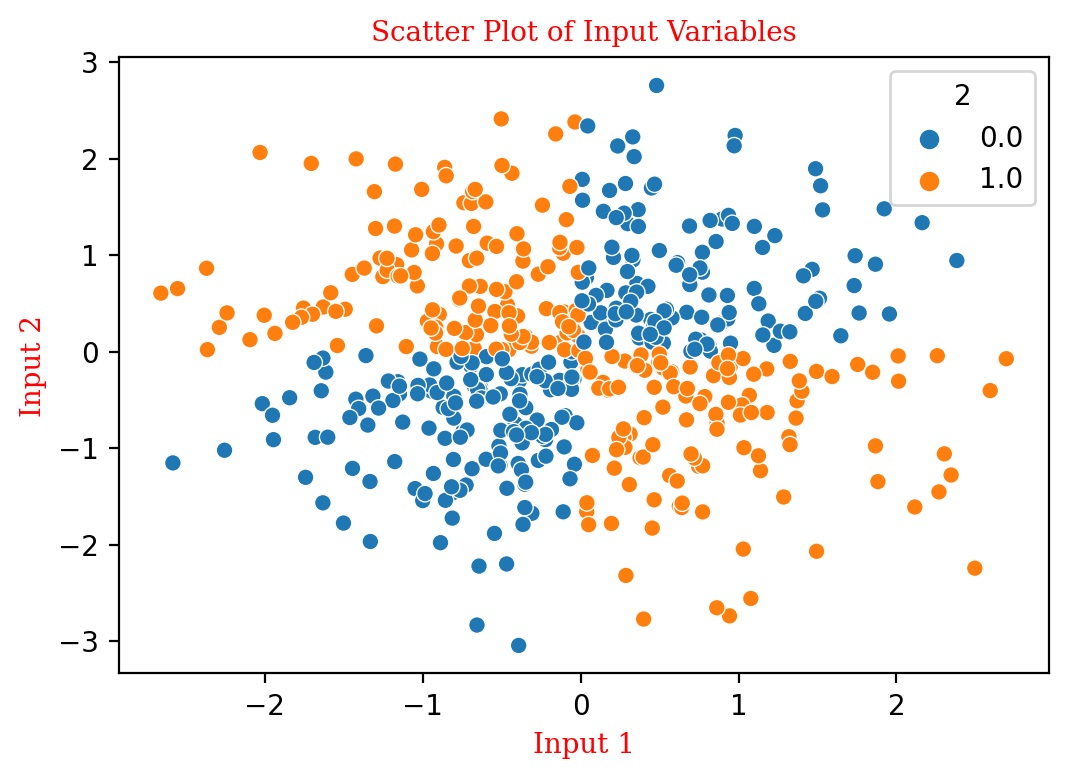

In [44]:
plt.figure(figsize=(6,4),dpi=200)
sns.scatterplot(x=df[0],y=df[1],hue=df[2])
plt.title("Scatter Plot of Input Variables",color='red',fontsize='medium',fontfamily='serif')
plt.xlabel("Input 1",color='red',fontsize='medium',fontfamily='serif')
plt.ylabel("Input 2",color='red',fontsize='medium',fontfamily='serif')
plt.show()

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[[0,1]],df[2],test_size=0.2,random_state=42)

In [46]:
X_train.shape, X_test.shape

((400, 2), (100, 2))

In [47]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_trains = scale.fit_transform(X_train)
X_tests = scale.transform(X_test)

In [90]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [91]:
model = Sequential()
model.add(Dense(6,activation="relu",input_dim=2,kernel_initializer="uniform"))
model.add(Dense(2,activation="relu",kernel_initializer="uniform"))
model.add(Dense(1,activation="sigmoid"))

In [92]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 6)                 18        
                                                                 
 dense_34 (Dense)            (None, 2)                 14        
                                                                 
 dense_35 (Dense)            (None, 1)                 3         
                                                                 
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


In [93]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [94]:
history = model.fit(X_trains,y_train,epochs=50,batch_size=12,validation_split=0.2)

Epoch 1/50
27/27 [==============================] - 1s 10ms/step - loss: 0.6926 - accuracy: 0.5437 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 2/50
27/27 [==============================] - 0s 4ms/step - loss: 0.6910 - accuracy: 0.5500 - val_loss: 0.6908 - val_accuracy: 0.5000
Epoch 3/50
27/27 [==============================] - 0s 4ms/step - loss: 0.6889 - accuracy: 0.5500 - val_loss: 0.6881 - val_accuracy: 0.5125
Epoch 4/50
27/27 [==============================] - 0s 3ms/step - loss: 0.6858 - accuracy: 0.5531 - val_loss: 0.6846 - val_accuracy: 0.5375
Epoch 5/50
27/27 [==============================] - 0s 4ms/step - loss: 0.6816 - accuracy: 0.5781 - val_loss: 0.6799 - val_accuracy: 0.5875
Epoch 6/50
27/27 [==============================] - 0s 3ms/step - loss: 0.6763 - accuracy: 0.6438 - val_loss: 0.6735 - val_accuracy: 0.6250
Epoch 7/50
27/27 [==============================] - 0s 3ms/step - loss: 0.6698 - accuracy: 0.6531 - val_loss: 0.6655 - val_accuracy: 0.6625
Epoch 8/50
27/27 [=

In [95]:
data = np.array([history.history["loss"],history.history["val_loss"]])
data = data.reshape(50,2)
[[data[:,0].max(),data[:,1].max()]]

[[0.6926314234733582, 0.6909526586532593]]

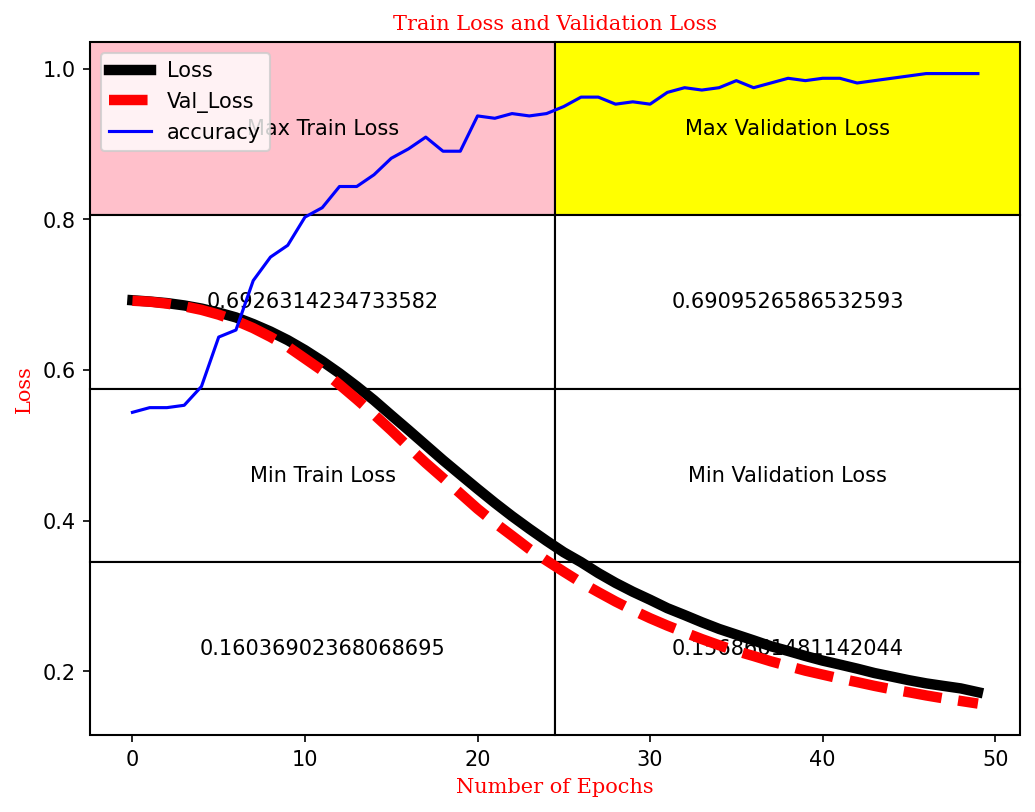

In [103]:
plt.figure(figsize=(8,6),dpi=150)
plt.plot(history.history["loss"],'black',linewidth=5)
plt.plot(history.history["val_loss"],'r--',linewidth=5)
plt.plot(history.history["accuracy"],"blue")
plt.table(cellText=[[data[:,0].max(),data[:,1].max()],["Min Train Loss","Min Validation Loss"],[data[:,0].min(),data[:,1].min()]],cellLoc='center',colWidths=[0.4,0.4,0.4],
         colLabels=['Max Train Loss','Max Validation Loss'],colColours=['pink','yellow'],bbox=[0,0,1,1])
plt.legend(["Loss","Val_Loss","accuracy"])
plt.title("Train Loss and Validation Loss",color='red',fontsize='medium',fontfamily='serif')
plt.xlabel("Number of Epochs",color='red',fontsize='medium',fontfamily='serif')
plt.ylabel("Loss",color='red',fontsize='medium',fontfamily='serif')
plt.show()

In [97]:
from mlxtend.plotting import plot_decision_regions as pt

33750/33750 [==============================] - 38s 1ms/step


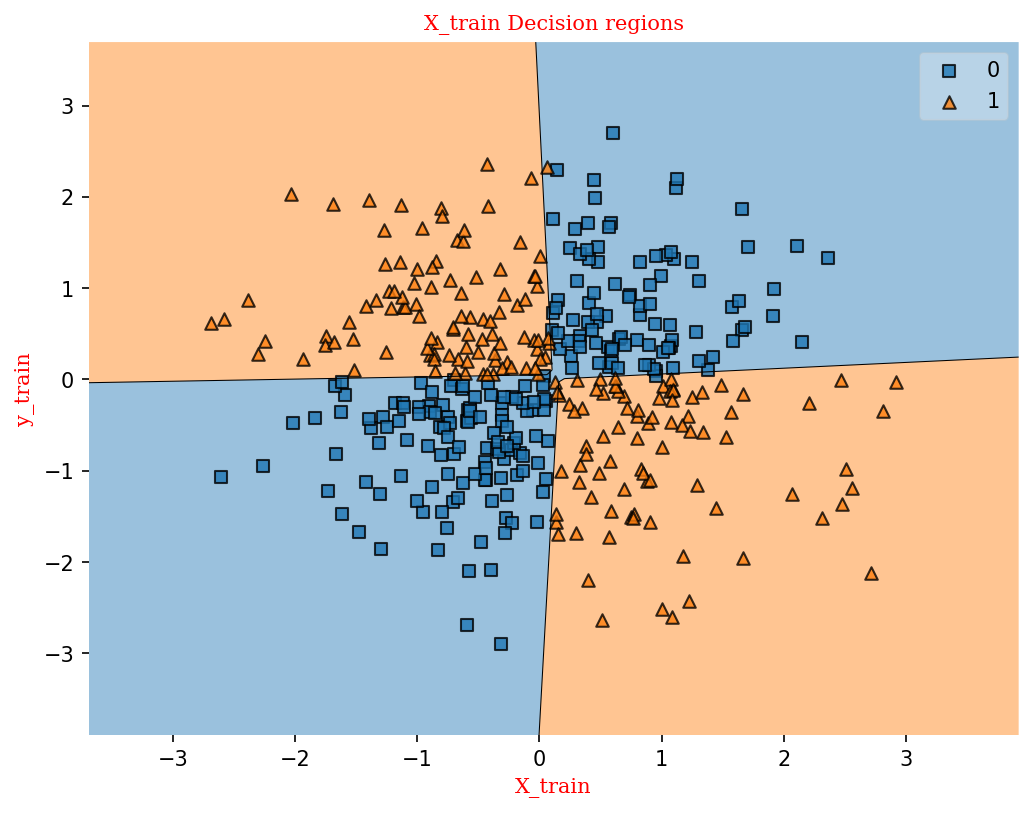

In [98]:
plt.figure(figsize=(8,6),dpi=150)
pt(X_trains,y_train.values.astype(int),clf=model)
plt.title("X_train Decision regions",color='red',fontsize='medium',fontfamily='serif')
plt.xlabel("X_train",color='red',fontsize='medium',fontfamily='serif')
plt.ylabel("y_train",color='red',fontsize='medium',fontfamily='serif')
plt.show()

In [99]:
y_pred = model.predict(X_tests)

4/4 [==============================] - 0s 2ms/step


In [100]:
y_predf = np.array([1 if x>0.5 else 0 for x in y_pred])

33750/33750 [==============================] - 40s 1ms/step


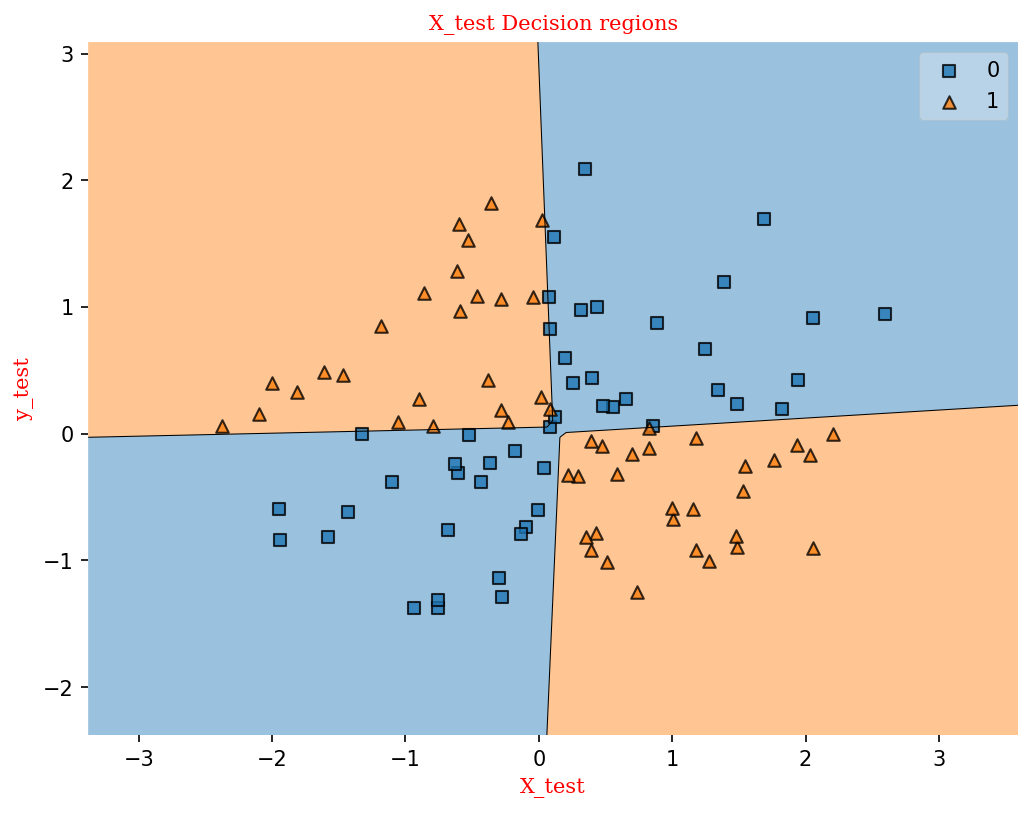

In [101]:
plt.figure(figsize=(8,6),dpi=150)
pt(X_tests,y_predf.astype(int),clf=model)
plt.title("X_test Decision regions",color='red',fontsize='medium',fontfamily='serif')
plt.xlabel("X_test",color='red',fontsize='medium',fontfamily='serif')
plt.ylabel("y_test",color='red',fontsize='medium',fontfamily='serif')
plt.show()